<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/IBM%20Quantum%20Challenge%202024/Lab3_Qiskit_Code_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Install Qiskit and relevant packages, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_ibm_runtime
!pip install qiskit_aer
!pip install graphviz
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
!pip install qiskit-code-assistant-jupyterlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0c2506fd91760a62d7a0270aa197048dca13379a0bead2e791d426123388e373
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:

### Save API Token, if needed

%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


In [4]:
%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86

env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


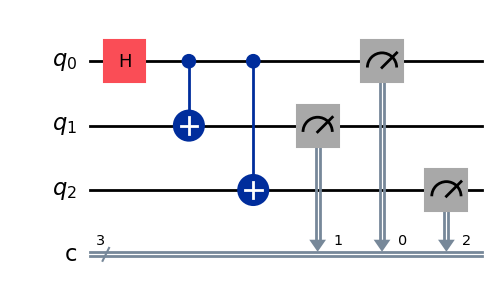

In [5]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Create a Quantum Circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gates
qc.cx(0, 1)
qc.cx(0, 2)

# Measure the qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
qc.draw('mpl')

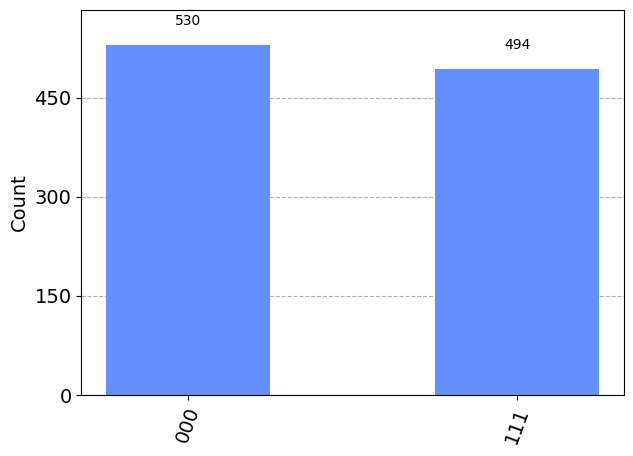

In [6]:
backend=AerSimulator(method='statevector')
job = transpile(qc, backend)
# Run and get counts
result = backend.run(job).result()
counts = result.get_counts(qc)
plot_histogram(counts)

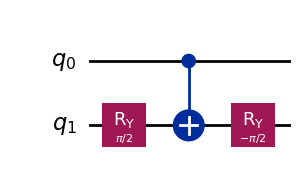

In [8]:
from qiskit import QuantumCircuit
import numpy as np # Import numpy

def ch(qc, ctrl, target):
  """
  Applies a Controlled Hadamard (CH) gate to the given qubits.

  Args:
      qc (QuantumCircuit): The quantum circuit to add the gate.
      ctrl (int): The control qubit index.
      target (int): The target qubit index.
  """
  # Apply an RY gate with angle pi/2 to the target qubit
  qc.ry(np.pi/2, target)

  # Apply a CNOT gate with control and target qubits
  qc.cx(ctrl, target)

  # Apply another RY gate with angle -pi/2 to the target qubit
  qc.ry(-np.pi/2, target)

# Example usage
qc = QuantumCircuit(2)
ch(qc, 0, 1)
qc.draw('mpl')  # View the circuit diagram

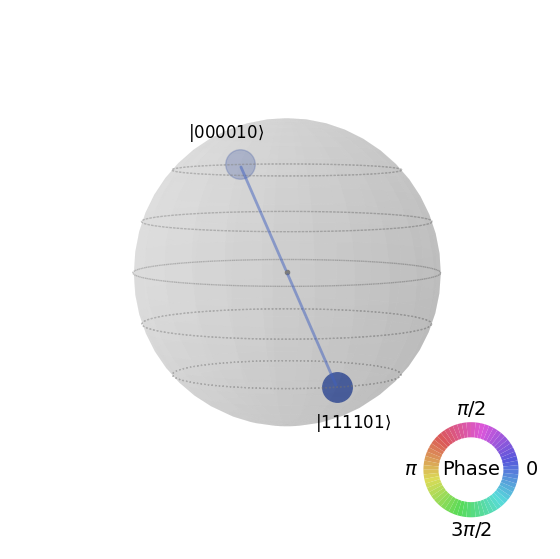

In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

state = [0] * 64  # Initialize with all zeros
state[2] = 1  # Set amplitude for basis state |010000>
state[61] = 1  # Set amplitude for basis state |111101>

# Create a quantum circuit (circuit doesn't directly replicate logo creation)
qc = QuantumCircuit(6)

# You can modify this part to explore different gate combinations
# This example applies Hadamard (H) to qubit 0 and CNOT (CX) gates for entanglement
qc.h(0)
for i in range(5):
  qc.cx(0, i+1)
qc.x(1)

# Visualize the statevector as a q-sphere
plot_state_qsphere(state, show_state_labels=True)